In [5]:
import sys
import os

# Get the absolute path of the current notebook's directory
notebook_dir = os.path.abspath('') 
# Go one level up to the project root
project_root = os.path.dirname(notebook_dir)

# Add the project root to the Python path
if project_root not in sys.path:
    sys.path.append(project_root)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from src.scaler import StandardScalerFromScratch
from src.model import MyLinearRegression
from src.metrics import mean_squared_error, r2_score

In [6]:
data = fetch_california_housing(as_frame=True)
df = data.frame
X = df.drop(columns=['MedHouseVal']).values
y = df['MedHouseVal'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
scaler = StandardScalerFromScratch()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [9]:
model = MyLinearRegression(alpha=0.01, n_iters=5000, verbose=False, random_state=42)
model.fit(X_train_s, y_train)

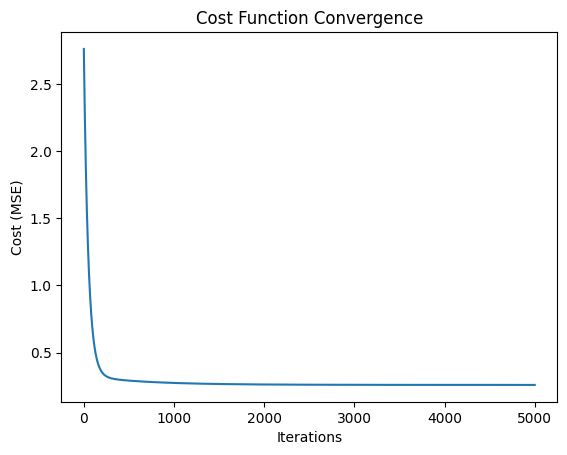

In [10]:
plt.plot(model.cost_history_)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.show()


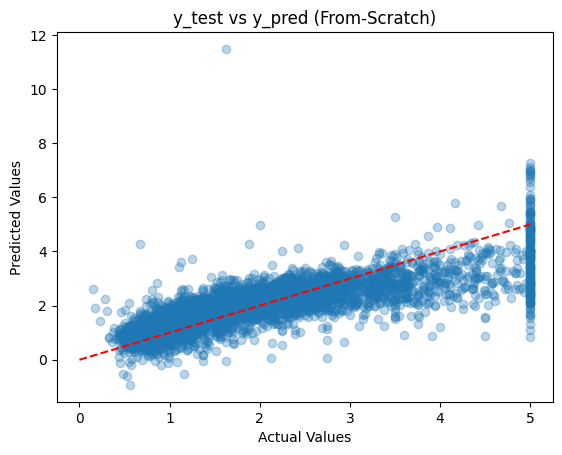

In [11]:
y_pred = model.predict(X_test_s)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, 5], [0, 5], color="red", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("y_test vs y_pred (From-Scratch)")
plt.show()

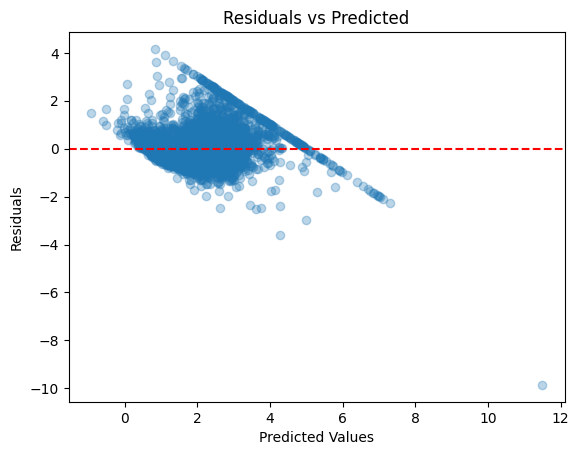

In [12]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

In [13]:
sc = StandardScaler().fit(X_train)
X_train_sk = sc.transform(X_train)
X_test_sk = sc.transform(X_test)
lr = LinearRegression().fit(X_train_sk, y_train)
y_pred_sk = lr.predict(X_test_sk)

print("From-scratch MSE:", mean_squared_error(y_test, y_pred))
print("From-scratch R2:", r2_score(y_test, y_pred))
print("sklearn MSE:", mean_squared_error(y_test, y_pred_sk))
print("sklearn R2:", r2_score(y_test, y_pred_sk))

From-scratch MSE: 0.5561847916032199
From-scratch R2: 0.57556396450378
sklearn MSE: 0.5558915986952442
sklearn R2: 0.575787706032451


      Feature  FromScratch   Sklearn
0      MedInc     0.862503  0.854383
1    HouseAge     0.126449  0.122546
2    AveRooms    -0.304950 -0.294410
3   AveBedrms     0.345781  0.339259
4  Population    -0.001025 -0.002308
5    AveOccup    -0.041395 -0.040829
6    Latitude    -0.860748 -0.896929
7   Longitude    -0.834410 -0.869842


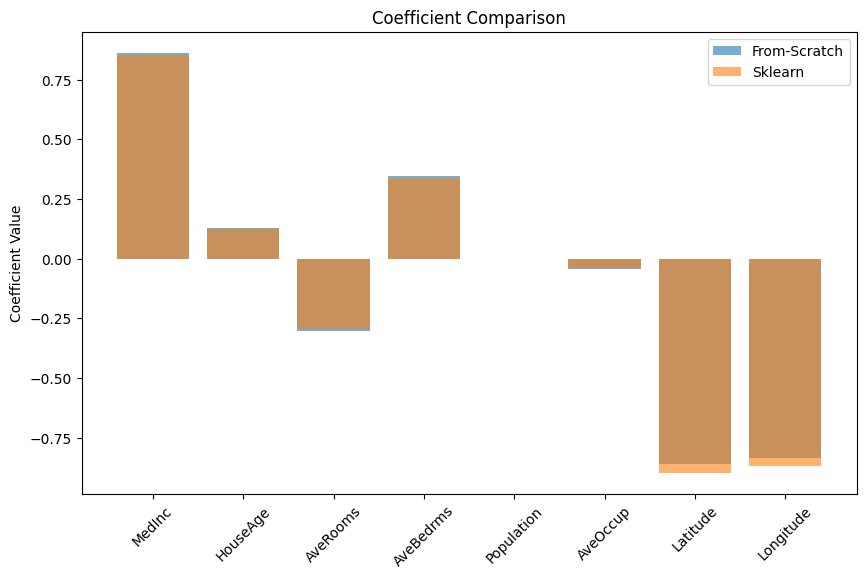

In [14]:
coef_df = pd.DataFrame({
    "Feature": data.feature_names,
    "FromScratch": model.w_,
    "Sklearn": lr.coef_
})
print(coef_df)

plt.figure(figsize=(10,6))
plt.bar(coef_df["Feature"], coef_df["FromScratch"], alpha=0.6, label="From-Scratch")
plt.bar(coef_df["Feature"], coef_df["Sklearn"], alpha=0.6, label="Sklearn")
plt.xticks(rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison")
plt.legend()
plt.show()